In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import hdf5storage
import h5py
import scipy.io as sio

import sys,os

import functions,loading

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [322]:
# basepath = r'A:\Data\AB1\day1'
basepath = r'A:\Data\GrosmarkAD\Achilles\Achilles_11012013'
nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(basepath)
ripples = loading.load_ripples_events(basepath)
cell_metrics,data = loading.load_cell_metrics(basepath)

In [324]:
cell_metrics.brainRegion.unique()

array(['lCA1', 'rCA1'], dtype=object)

In [325]:
ripple_epochs = nel.EpochArray([np.array([ripples.start,ripples.stop]).T])

brain_idx = np.where((cell_metrics.brainRegion.values=="lCA1") | (cell_metrics.brainRegion.values=="rCA1"))
st = nel.SpikeTrainArray(timestamps=np.array(np.array(data['spikes'])[brain_idx],dtype="object"), fs=fs_dat)
st_rip = st[ripple_epochs]

st_rip

<ipython-input-325-f23c51d97a6d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<SpikeTrainArray at 0x2638807aaf0: 104 units (10,056 segments)> at 20000 Hz

In [327]:
cell_metrics = cell_metrics[(cell_metrics.brainRegion.values=="lCA1") | (cell_metrics.brainRegion.values=="rCA1")]


In [380]:
# colors1 = []
# for i in range(len(cell_metrics['putativeCellType'])):
#     if cell_metrics.putativeCellType.loc[i]=='Pyramidal Cell':
#       colors1.append('k')  
#     else:
#       colors1.append('r')  

# group_colors = {"Deep_WAKEepisode": '#7b3294',
#             "Deep_NREMepisode": '#c2a5cf',
#             'Superficial_WAKEepisode': '#008837',
#             'Superficial_NREMepisode': '#a6dba0'} 

colors1 = []
for i in range(len(cell_metrics['deepSuperficial'])):
    if cell_metrics.deepSuperficial.iloc[i]=='Deep':
      # colors1.append('#7b3294') 
      colors1.append('r')  
    elif cell_metrics.deepSuperficial.iloc[i]=="Superficial":
      # colors1.append('#008837') 
      colors1.append('k') 
    else:
      colors1.append('grey') 

cell_metrics.deepSuperficial.unique()

array(['Deep', 'Superficial'], dtype=object)

In [329]:
n_active = []
for event in st_rip:
    n_active.append(event.n_active)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


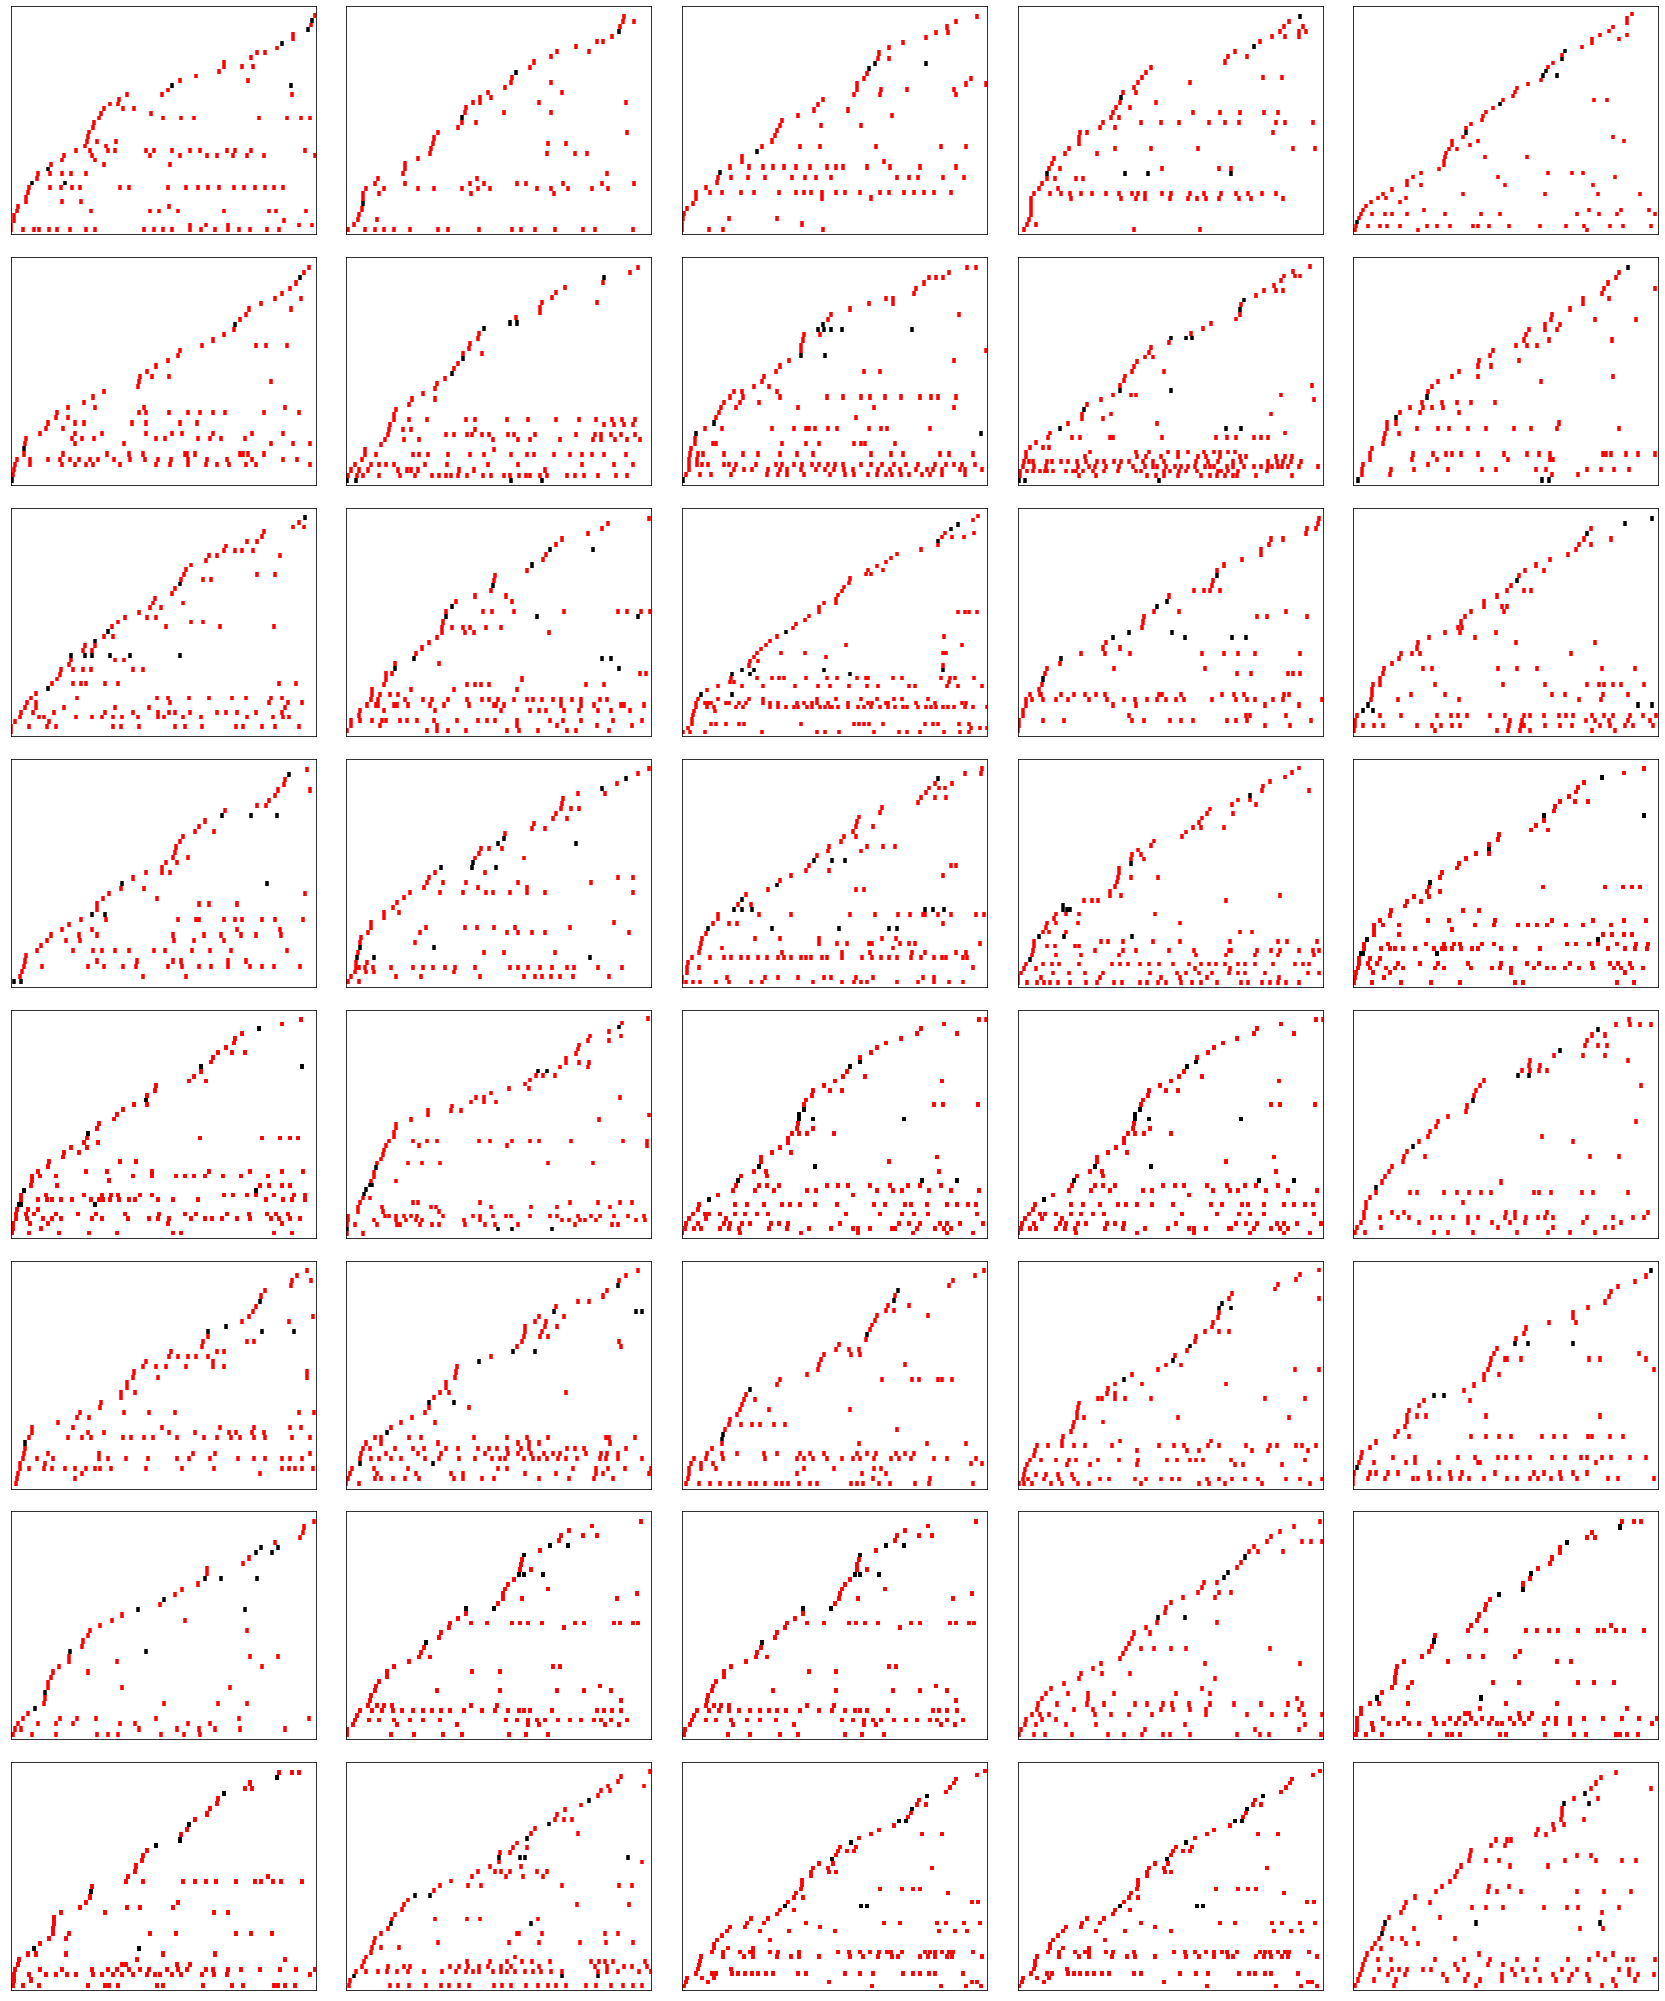

In [382]:
def plot_seq(st_rip,ripples,rip,ax,colors1):
    rip = int(rip)
    order_idx = np.array(st_rip[rip].get_event_firing_order())-1
    
    ax.eventplot(st_rip[rip].data[order_idx],colors=np.array(colors1)[order_idx],linewidth=3.5)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_ylim(-1,st_rip[rip].n_active+1)
    ax.set_xlim(ripples.start.loc[rip],ripples.stop.loc[rip])

fig, axs = plt.subplots(8,5, figsize=functions.set_size('thesis', fraction=5, subplots=(10, 5)), edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.1)
axs = axs.ravel()

for i,rip in enumerate(np.sort(np.argsort(n_active)[::-1][:40])):
    plot_seq(st_rip,ripples,rip,axs[i],colors1)
    axs[i].axes.get_yaxis().set_ticks([])
    axs[i].axes.get_xaxis().set_ticks([])

fig_save_path = 'G:/My Drive/post_doc/ripple_diversity/project_log'

plt.savefig(os.path.join(fig_save_path,'sequence_explore.pdf'),dpi=300,bbox_inches='tight')

# rip = 561

# # order_idx = np.argsort(rank_order_mat[:,rip])
# order_idx = np.array(st_rip[rip].get_event_firing_order())-1

# plt.eventplot(st_rip[rip].data[order_idx],colors=colors1)
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.ylim(-1,st_rip[rip].n_active)
# plt.xlim(ripples.start.loc[rip],ripples.stop.loc[rip])


(1848.928, 1848.9704)

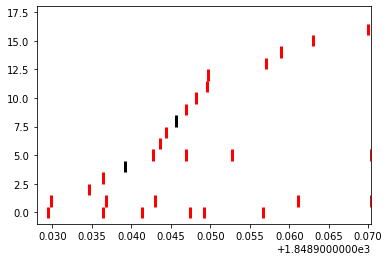

In [393]:
rip = 600
rip = int(rip)

order_idx = np.array(st_rip[rip].get_event_firing_order())-1
plt.eventplot(st_rip[rip].data[order_idx],colors=np.array(colors1)[order_idx],linewidth=3)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylim(-1,st_rip[rip].n_active+1)
plt.xlim(ripples.start.loc[rip],ripples.stop.loc[rip])



In [1]:
st_rip[rip].data[order_idx]

NameError: name 'st_rip' is not defined

In [111]:
def load_rankStats(basepath):

    filename = glob.glob(basepath+os.sep+'*rankStats.mat')[0]
    
    # check if saved file exists
    if not os.path.exists(filename):
        warnings.warn("file does not exist")
        return pd.DataFrame()

    data = sio.loadmat(filename)
    rank_order = np.nanmedian(data['rankStats']['rankUnits'][0][0],axis=1)
    rank_order_mat = data['rankStats']['rankUnits'][0][0]
    # df = pd.DataFrame()
    return rank_order,rank_order_mat

rank_order,rank_order_mat = load_rankStats(basepath)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\lib\nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
